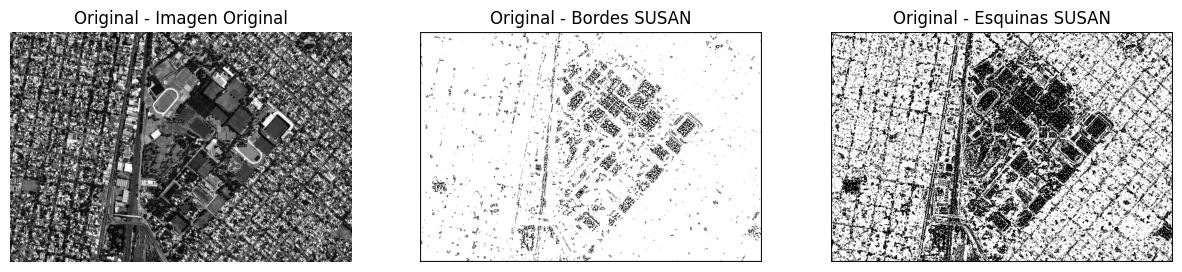

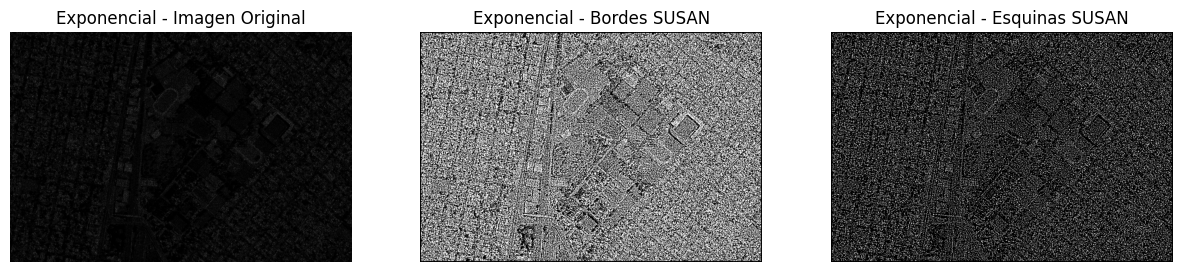

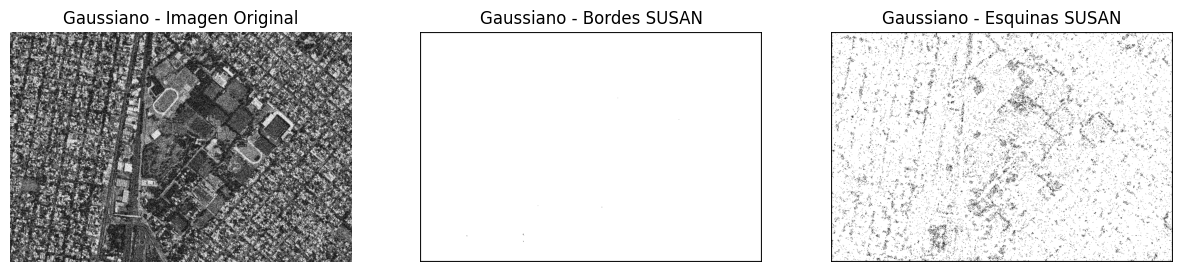

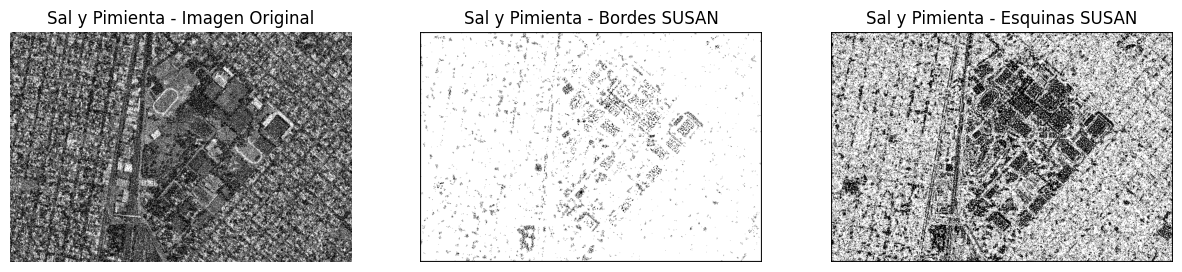

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def susan_edge_detection(image, threshold=27, brightness_diff=20):
    """Implementa el método SUSAN para la detección de bordes."""
    # Convertir a escala de grises si no lo está
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    rows, cols = gray.shape
    result = np.zeros((rows, cols), dtype=np.uint8)

    # Parámetros de SUSAN
    radius = 3  # Radio del núcleo de 7x7
    for i in range(radius, rows - radius):
        for j in range(radius, cols - radius):
            # Obtener la región vecina
            nucleus = gray[i - radius:i + radius + 1, j - radius:j + radius + 1]
            center_pixel = gray[i, j]
            susan_area = np.sum(np.abs(nucleus - center_pixel) < brightness_diff)

            # Aplicar el umbral para detectar bordes
            if susan_area < threshold:
                result[i, j] = 255

    return result

def susan_corner_detection(image, threshold=10, brightness_diff=15):
    """Implementa el método SUSAN para la detección de esquinas."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    rows, cols = gray.shape
    result = np.zeros((rows, cols), dtype=np.uint8)

    # Parámetros de SUSAN
    radius = 3
    for i in range(radius, rows - radius):
        for j in range(radius, cols - radius):
            nucleus = gray[i - radius:i + radius + 1, j - radius:j + radius + 1]
            center_pixel = gray[i, j]
            susan_area = np.sum(np.abs(nucleus - center_pixel) < brightness_diff)

            # Aplicar el umbral para detectar esquinas
            if susan_area < threshold:
                result[i, j] = 255

    return result

# Lista de imágenes y procesamiento de cada una
images = [
    ("Original", "lanus.png"),
    ("Exponencial", "noisy-images/imagen_ruido_exponencial.png"),
    ("Gaussiano", "noisy-images/imagen_ruido_gaussiano.png"),
    ("Sal y Pimienta", "noisy-images/imagen_ruido_sal_pimienta.png"),
]

for title, path in images:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Detección de bordes y esquinas
    edges = susan_edge_detection(img)
    corners = susan_corner_detection(img)

    # Visualización
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title(f'{title} - Imagen Original')
    axes[1].imshow(edges, cmap='gray')
    axes[1].set_title(f'{title} - Bordes SUSAN')
    axes[2].imshow(corners, cmap='gray')
    axes[2].set_title(f'{title} - Esquinas SUSAN')
    for ax in axes:
        ax.axis('off')
    plt.show()


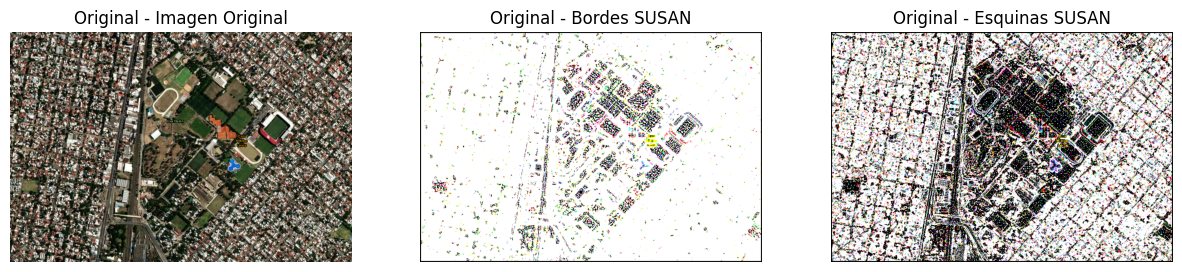

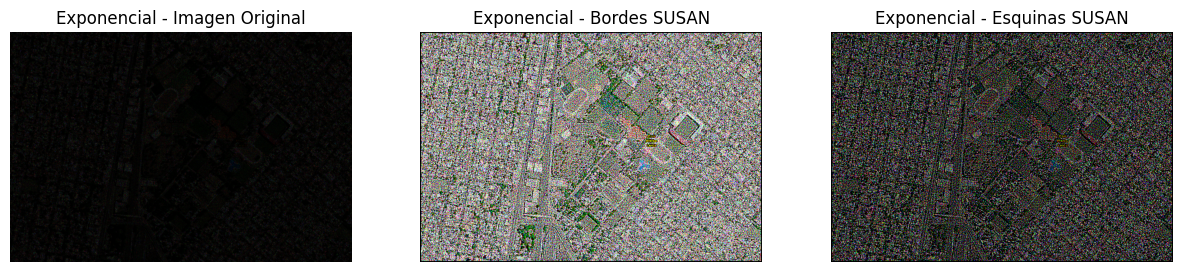

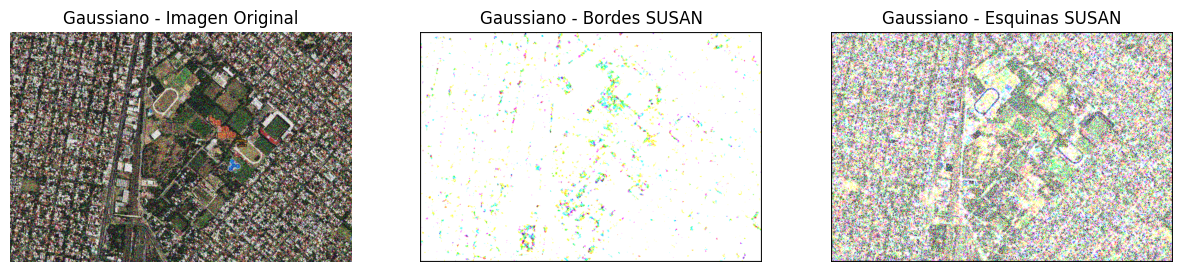

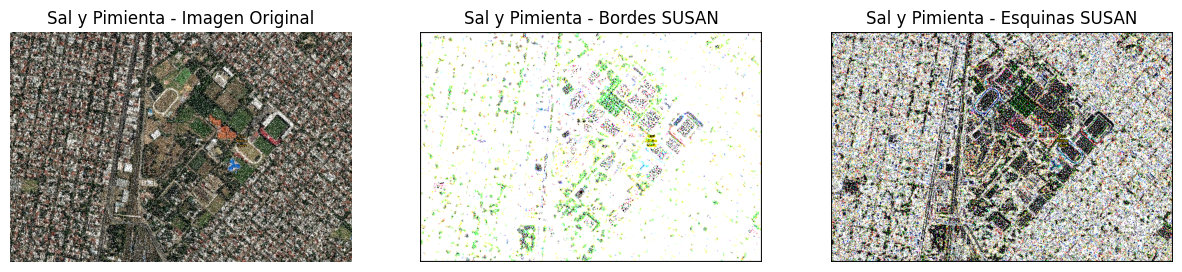

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def susan_edge_detection(image, threshold=27, brightness_diff=20):
    """Implementa el método SUSAN para la detección de bordes en una imagen RGB."""
    result = np.zeros_like(image)
    rows, cols, _ = image.shape
    radius = 3  # Radio del núcleo de 7x7

    for i in range(radius, rows - radius):
        for j in range(radius, cols - radius):
            for channel in range(3):  # Procesar cada canal RGB
                nucleus = image[i - radius:i + radius + 1, j - radius:j + radius + 1, channel]
                center_pixel = image[i, j, channel]
                susan_area = np.sum(np.abs(nucleus - center_pixel) < brightness_diff)

                # Aplicar el umbral para detectar bordes
                if susan_area < threshold:
                    result[i, j, channel] = 255

    return result

def susan_corner_detection(image, threshold=10, brightness_diff=15):
    """Implementa el método SUSAN para la detección de esquinas en una imagen RGB."""
    result = np.zeros_like(image)
    rows, cols, _ = image.shape
    radius = 3

    for i in range(radius, rows - radius):
        for j in range(radius, cols - radius):
            for channel in range(3):  # Procesar cada canal RGB
                nucleus = image[i - radius:i + radius + 1, j - radius:j + radius + 1, channel]
                center_pixel = image[i, j, channel]
                susan_area = np.sum(np.abs(nucleus - center_pixel) < brightness_diff)

                # Aplicar el umbral para detectar esquinas
                if susan_area < threshold:
                    result[i, j, channel] = 255

    return result

# Lista de imágenes y procesamiento de cada una
images = [
    ("Original", "lanus.png"),
    ("Exponencial", "noisy-images/imagen_ruido_exponencial.png"),
    ("Gaussiano", "noisy-images/imagen_ruido_gaussiano.png"),
    ("Sal y Pimienta", "noisy-images/imagen_ruido_sal_pimienta.png"),
]

for title, path in images:
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detección de bordes y esquinas
    edges = susan_edge_detection(img_rgb)
    corners = susan_corner_detection(img_rgb)

    # Visualización
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_rgb)
    axes[0].set_title(f'{title} - Imagen Original')
    axes[1].imshow(edges)
    axes[1].set_title(f'{title} - Bordes SUSAN')
    axes[2].imshow(corners)
    axes[2].set_title(f'{title} - Esquinas SUSAN')
    for ax in axes:
        ax.axis('off')
    plt.show()
